In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
x = df[['Height']].values # input
y_true = df[['Weight']].values # label 

In [5]:
def line(x, w = 0, b = 0):
    return w * x + b

def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

Text(0.5,0,'b')

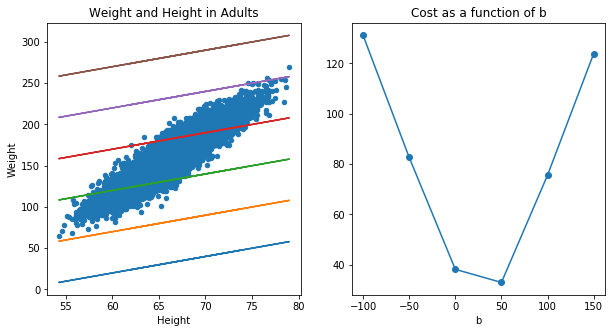

In [6]:
plt.figure(figsize = (10, 5))
ax1 = plt.subplot(121)
df.plot(kind = 'scatter',
       x = 'Height',
       y = 'Weight',
       title = 'Weight and Height in Adults', ax = ax1)
bs = np.array([-100, -50, 0, 50, 100, 150])
mses = []
for b in bs:
    y_pred = line(x, w = 2, b = b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(x, y_pred)

ax2 = plt.subplot(122)
plt.plot(bs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

In [7]:
from tensorflow.keras import models, layers 

In [8]:
x

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [9]:
x.shape

(10000, 1)

In [10]:
model = models.Sequential()
model.add(layers.Dense(1, input_shape = (1,)))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [13]:
model.fit(x, y_true, epochs = 60)

Train on 10000 samples
Epoch 1/60
10000/10000 [==============================] - 1s 111us/sample - loss: 51185.7295
Epoch 2/60
10000/10000 [==============================] - 0s 45us/sample - loss: 42488.3310
Epoch 3/60
10000/10000 [==============================] - 0s 45us/sample - loss: 34933.2434
Epoch 4/60
10000/10000 [==============================] - 0s 45us/sample - loss: 28412.3496
Epoch 5/60
10000/10000 [==============================] - 0s 44us/sample - loss: 22819.4563
Epoch 6/60
10000/10000 [==============================] - 0s 43us/sample - loss: 18065.8305
Epoch 7/60
10000/10000 [==============================] - 0s 44us/sample - loss: 14072.2546
Epoch 8/60
10000/10000 [==============================] - 0s 44us/sample - loss: 10762.6468
Epoch 9/60
10000/10000 [==============================] - 0s 45us/sample - loss: 8065.3805
Epoch 10/60
10000/10000 [==============================] - 0s 44us/sample - loss: 5915.1104
Epoch 11/60
10000/10000 [==============================] 

In [14]:
y_pred = model.predict(x)

In [15]:
y_pred

array([[181.26169],
       [168.88464],
       [181.90457],
       ...,
       [156.87708],
       [169.50125],
       [152.17622]], dtype=float32)

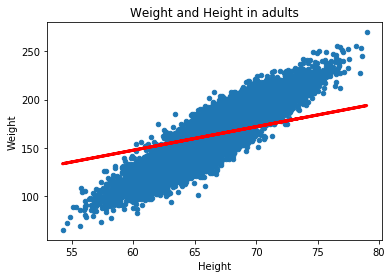

In [16]:
df.plot(kind = 'Scatter',
       x = 'Height',
       y = 'Weight', title = 'Weight and Height in adults')
plt.plot(x, y_pred, color = 'red', linewidth = 3)

In [18]:
w, b = model.get_weights()
w

array([[2.4435868]], dtype=float32)

In [19]:
b

array([0.81008565], dtype=float32)

In [20]:
model.predict([[200]])

array([[489.52747]], dtype=float32)